In [47]:
import numpy as np 
import numpy.linalg as LA
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve,correlate

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [35]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
ruta2 = 'Imagenes de pruebas/cameraman.jpg'
ruta3 = 'Imagenes de pruebas/peppers_gray.tif'
ruta4 = "Imagenes de pruebas/test.png"

In [4]:
def verificar(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    return img 

In [5]:
DxRoberts = np.array([[1, 0],[0, -1]], dtype=np.float32)  
DyRoberts = np.array([[0, 1],[-1, 0]], dtype=np.float32)  
DxPrewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=np.float32)
DyPrewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype=np.float32)
DxSobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
DySobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=np.float32)

### Ejercicio 1 

In [82]:
def detector(ruta:str,umbral:int,method:str,mostrar:bool=False): 
    img = verificar(ruta)
    if method == "Roberts":
        gradX = convolve(img,DxRoberts)#cv2.filter2D(img,-1,DxRoberts)
        gradY = convolve(img,DyRoberts)#cv2.filter2D(img,-1,DyRoberts)
    elif method == "Prewitt":
        gradX = convolve(img,DxPrewitt)#cv2.filter2D(img,-1,DxPrewitt)
        gradY = convolve(img,DyPrewitt)#cv2.filter2D(img,-1,DyPrewitt)
    elif method == "Sobel":
        gradX = convolve(img,DxSobel)#cv2.filter2D(img,-1,DxSobel)
        gradY = convolve(img,DySobel)#cv2.filter2D(img,-1,DySobel)
    else :
        print("Method not exists")
        exit()
    #mag = np.sqrt(gradX**2+gradY**2)
    mag = LA.norm([gradX,gradY],axis=0,ord=2)# np.sqrt(gradX**2+gradY**2)
    #mag = LA.norm([gradX,gradY],axis=0,ord=1)
    
    norm_mag = ((mag-np.min(mag) / (np.max(mag)-np.min(mag))) * 255)
    norm_mag = norm_mag > umbral #((norm_mag > umbral) * 255).astype(np.uint8)
    #norm_mag = ().astype(np.uint8)
    if mostrar :
        plt.figure(figsize=(10, 5))  # Tamaño de la figura
        
        plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
        plt.imshow(img, cmap='gray')  # Mostrar la imagen en escala de grises
        plt.title("Original")  # Título de la primera imagen
        plt.axis('off')  # Ocultar ejes
        
        # Segunda imagen
        plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
        plt.imshow(norm_mag, cmap='gray')  # Mostrar la imagen en escala de grises
        plt.title(f"Method: {method} umbral : {umbral}")  # Título de la segunda imagen
        plt.axis('off')  # Ocultar ejes
        
        # Mostrar las imágenes
        plt.tight_layout()
        plt.show()
    return norm_mag

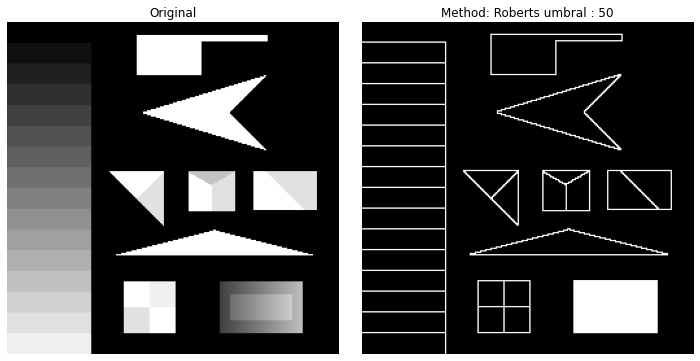

In [83]:
rober = detector(ruta4,50,"Roberts",True)

### Ejercicio 2.

In [15]:
LPkernel = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])

In [33]:
def LP(ruta:str, threshold=0,mostrar:bool=False):
    img = verificar(ruta)
    img_smooth = cv2.GaussianBlur(img, (3, 3), 0)

    # Calcular el Laplaciano de la imagen suavizada
    laplacian = cv2.filter2D(img_smooth,-1,LPkernel)

    # Detectar cruces por cero
    zero_crossing = np.zeros_like(laplacian, dtype=np.uint8)
    rows, cols = laplacian.shape

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Extraer el valor del píxel actual y sus vecinos
            current_pixel = laplacian[i, j]
            neighbors = [laplacian[i-1, j], laplacian[i+1, j],  # arriba y abajo
                         laplacian[i, j-1], laplacian[i, j+1],  # izquierda y derecha
                         laplacian[i-1, j-1], laplacian[i+1, j+1],  # diagonal superior izq y diagonal inferior der
                         laplacian[i-1, j+1], laplacian[i+1, j-1]]  # diagonal superior der y diagonal inferior izq

            # Detectar si existe un cruce por cero
            if any((current_pixel > 0 and neighbor < 0) or (current_pixel < 0 and neighbor > 0) for neighbor in neighbors):
                zero_crossing[i, j] = 255  # Marcar el píxel como borde
    if mostrar :
        plt.figure(figsize=(10, 5))  # Tamaño de la figura
        
        plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
        plt.imshow(img, cmap='gray')  # Mostrar la imagen en escala de grises
        plt.title("Original")  # Título de la primera imagen
        plt.axis('off')  # Ocultar ejes
        
        # Segunda imagen
        plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
        plt.imshow(zero_crossing, cmap='gray')  # Mostrar la imagen en escala de grises
        plt.title("LP")  # Título de la segunda imagen
        plt.axis('off')  # Ocultar ejes
        
        # Mostrar las imágenes
        plt.tight_layout()
        plt.show()
    #return zero_crossing

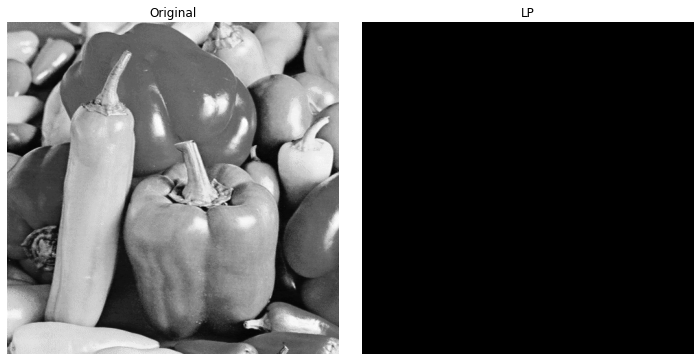

In [34]:
LP(ruta3,mostrar=True)